In [1]:
!pip install app-store-scraper

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
!pip install google-play-scraper

  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.1-cp38-none-any.whl size=22265 sha256=49be3848e75133f4d20ffbb5fb525447c3943caf40ebb78f9e73d17de4d68f94
  Stored in directory: C:\Users\ABCD\AppData\Local\pip\Cache\wheels\d7\1f\71\e2b30aab85297ad6dd2e3049587a6763cfb7e803a0b76d982e
Successfully built google-play-scraper


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
from app_store_scraper import AppStore
from pprint import pprint

In [4]:
ford = AppStore(country="us",app_name='FordPass', app_id=1095418609)
revs=ford .review()
reviews_list=[rev['review'] for rev in ford.reviews]

2020-09-02 08:47:00,457 [INFO] AppStore - Initialised: AppStore('us', 'fordpass', 1095418609)
2020-09-02 08:47:00,459 [INFO] AppStore - Ready to fetch reviews from: https://apps.apple.com/us/app/fordpass/id1095418609
2020-09-02 08:47:05,614 [INFO] AppStore - [id:1095418609] Fetched 260 reviews (260 fetched in total)
2020-09-02 08:47:11,164 [INFO] AppStore - [id:1095418609] Fetched 540 reviews (540 fetched in total)
2020-09-02 08:47:16,744 [INFO] AppStore - [id:1095418609] Fetched 820 reviews (820 fetched in total)
2020-09-02 08:47:22,297 [INFO] AppStore - [id:1095418609] Fetched 1100 reviews (1100 fetched in total)
2020-09-02 08:47:28,091 [INFO] AppStore - [id:1095418609] Fetched 1400 reviews (1400 fetched in total)
2020-09-02 08:47:33,548 [INFO] AppStore - [id:1095418609] Fetched 1680 reviews (1680 fetched in total)
2020-09-02 08:47:39,309 [INFO] AppStore - [id:1095418609] Fetched 1980 reviews (1980 fetched in total)
2020-09-02 08:47:44,883 [INFO] AppStore - [id:1095418609] Fetched 22

In [8]:
from google_play_scraper import app
from google_play_scraper import Sort,reviews_all
result = reviews_all('com.ford.fordpass')

In [9]:
import pandas as pd
import re
import nltk
tokenizer = nltk.tokenize.TreebankWordTokenizer()
stemmer = nltk.stem.SnowballStemmer("english")
data_text= [x.lower() for x in reviews_list]
data_n = [re.sub('[,\.!?]', '',x) for x in data_text]
data_n = [(" ".join(stemmer.stem(token) for token in tokenizer.tokenize(review))) for review in data_n]
len(data_n)

4523

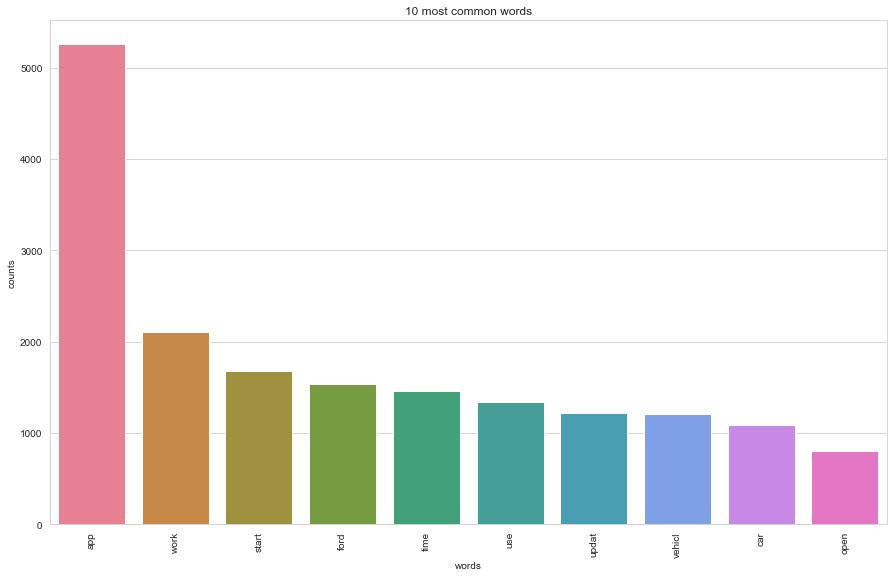

<Figure size 432x288 with 0 Axes>

In [10]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    plt.savefig("common_words.png")
# Initialise the count vectorizer with the English stop words
#additional_stopwords=('app','toyota','car','just')
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data_n)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [11]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
app ford use car sync vehicl tire connect doe password

Topic #1:
app work updat open crash time use fix tri everi

Topic #2:
app ford time use vehicl work log password veri tri

Topic #3:
start app car remot work time lock unlock featur use

Topic #4:
ford app vehicl servic work love truck new great use


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.8MB/s 
     |████████████████████████████████| 552kB 43.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=3650f74caeba41448b018a39da803ad7a76e324c38b28d046641104c30faa393
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=6f238288d67e2f1cadb97dbb863ee0c7d087a85ca3ea5d773d97ff0ee464a22f
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [12]:
import pyLDAvis
import pyLDAvis.sklearn
vis = pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

2020-09-02 08:54:14,655 [INFO] numexpr.utils - NumExpr defaulting to 4 threads.
